Computational Take on Statistics: Simulating Outcomes
========

What we'll be doing
-------

- Learn to use Python's `random` module
- Simulating probabilities to common events

In [9]:
reset -fs

In [10]:
# Python's random generates pseudo-random numbers
# from random import 

In [11]:
# Import a function that chooses amoung discrete outcomes
from random import choice

In [12]:
choice?

In [13]:
# Roll a die
choice([1, 2, 3, 4, 5, 6])

3

How could we roll a 4-sided die? or a 20-sided die?

In [14]:
# Let's create a variable for number of sides

In [15]:
# Traditional die: A cube
n_sides = 6
faces = list(range(1, n_sides+1)) 
choice(faces)

5

That is a lot of typing. Let's make a function:

In [16]:
from typing import List

def faces(n_sides: int) -> List[int]:
    "Enumerate the faces of a die"
    return list(range(1, n_sides+1))

In [17]:
faces?

In [18]:
# Roll a 20-sided die
choice(faces(n_sides=20))

16

What if we want to roll more than one die?

In [19]:
from random import choices

choices?

Let's check out the documentation for [random.choices](https://docs.python.org/3/library/random.html)

In [20]:
# Let's roll our die a couple of times
choices(population=faces(n_sides=6),
        k=2)

[5, 1]

In [ ]:
# How could we roll a 20-sided die 1,000 times?



In [21]:
choices(population=faces(n_sides=20),
        k=1_000)

[11,
 17,
 8,
 10,
 15,
 19,
 2,
 3,
 13,
 12,
 16,
 20,
 9,
 1,
 1,
 19,
 3,
 13,
 9,
 8,
 5,
 9,
 1,
 4,
 8,
 19,
 12,
 8,
 3,
 2,
 3,
 15,
 9,
 11,
 17,
 7,
 3,
 1,
 17,
 19,
 2,
 20,
 14,
 13,
 10,
 16,
 15,
 19,
 9,
 4,
 15,
 13,
 13,
 12,
 14,
 20,
 15,
 9,
 5,
 1,
 15,
 11,
 4,
 17,
 15,
 7,
 19,
 8,
 19,
 3,
 17,
 19,
 20,
 13,
 9,
 8,
 18,
 5,
 19,
 6,
 3,
 14,
 1,
 19,
 12,
 4,
 7,
 12,
 17,
 14,
 3,
 18,
 11,
 5,
 16,
 9,
 7,
 16,
 8,
 12,
 2,
 5,
 7,
 11,
 5,
 19,
 17,
 7,
 13,
 19,
 16,
 19,
 18,
 1,
 16,
 20,
 10,
 9,
 11,
 9,
 6,
 10,
 16,
 7,
 19,
 3,
 4,
 11,
 3,
 9,
 17,
 19,
 12,
 18,
 10,
 17,
 6,
 3,
 4,
 9,
 17,
 1,
 14,
 3,
 12,
 2,
 15,
 9,
 17,
 4,
 12,
 4,
 10,
 15,
 13,
 20,
 20,
 8,
 19,
 3,
 10,
 15,
 6,
 18,
 15,
 16,
 3,
 16,
 17,
 17,
 16,
 10,
 2,
 4,
 3,
 11,
 7,
 7,
 9,
 17,
 8,
 11,
 20,
 20,
 12,
 16,
 1,
 9,
 4,
 5,
 9,
 8,
 11,
 18,
 14,
 12,
 6,
 13,
 11,
 14,
 6,
 13,
 16,
 1,
 5,
 2,
 12,
 14,
 1,
 4,
 16,
 1,
 15,
 12,
 2,
 16,
 19,
 12,
 7,
 

In [ ]:
# What if we want to cheat by having a weighted die?



In [22]:
rolls = choices(population=faces(n_sides=4),
        weights=[10, 5, 30, 5], 
        k=25)
print(rolls)

[3, 4, 1, 4, 3, 4, 4, 2, 3, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1]


Data Scientists ❤️ counting
------

Data Science is mostly about counting.

Let's count our outcomes …

In [23]:
from collections import Counter

Counter(rolls)

Counter({3: 14, 4: 5, 1: 5, 2: 1})

How would we order the results?

In [24]:
rolls_counts = Counter(rolls)
# Sort by faces
sorted(rolls_counts.items(), key=lambda x: x[0]) 
 # Sort by counts
sorted(rolls_counts.items(), key=lambda x: x[1])

rolls_counts = dict(sorted(rolls_counts.items(), key=lambda x: x[0]))

Data Science is about visualization.

Python's visualization is kinda mess. It is a bazaar, not a cathedral. There are many options. Some people would say too many options.

`matplotlib` is the default. 

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
rolls_counts

{1: 5, 2: 1, 3: 14, 4: 5}

In [27]:
# Unpack dict
labels, values = zip(*rolls_counts.items())

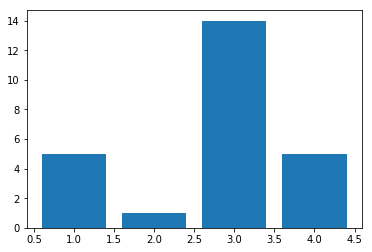

In [28]:
plt.bar(x=labels, 
        height=values);

In [29]:
# Roll 2 dice
roll_2_dice = (lambda: choices(population=list(range(1, n_sides+1)),
                      k=2))
roll_2_dice()

[1, 4]

In [30]:
sum(roll_2_dice())

9

In [31]:
# TODO:  Simulate rolling a sum of seven
rolls = [sum(roll_2_dice()) for _ in range(10_0000)]

In [32]:
rolls_counts = Counter(rolls)

In [33]:
rolls_counts.most_common(n=1)

[(7, 16600)]

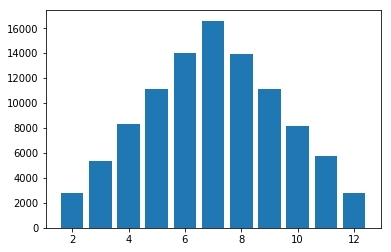

In [34]:
plt.bar(x=rolls_counts.keys(), 
        height=rolls_counts.values());

Any questions

Counting Cards with Python
------

In [35]:
# Create deck
deck = Counter(tens=16, low_cards=36)
deck

Counter({'tens': 16, 'low_cards': 36})

In [36]:
deck.elements?

In [37]:
from random import sample

In [38]:
# Deal a card, any card
sample(list(deck.elements()), k=1)

['low_cards']

In [39]:
# Sample without replacement
n_cards = 20
seen = sample(list(deck.elements()), # (without replacement) 
              k=n_cards) 
seen

['low_cards',
 'low_cards',
 'tens',
 'low_cards',
 'tens',
 'tens',
 'low_cards',
 'tens',
 'low_cards',
 'low_cards',
 'tens',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'tens',
 'tens',
 'low_cards',
 'tens']

In [40]:
# Determine the proportion of cards with a ten-value (a ten, jack, queen, or king).
seen.count('tens') / n_cards

0.4

Hit or not?

Biased coin
------

In [41]:
# Bernouli Trial
trial = (lambda: choices(population='HT', # 2 sided coin
                        cum_weights=(0.60, 1.00), # Bias - Settles on heads 60% of the time.
                        k=7) # Number of spins (not flips)
                 .count('H') >= 5) # Five Heads / Successes

In [42]:
trial()

False

In [43]:
n_trials = 100_000
sum(trial() for _ in range(n_trials)) / n_trials

0.41948

In [44]:
# Probability of the median of 5 samples being in middle two quartiles
trial = lambda: 2500 <= sorted(choices(range(10000), k=5))[2]  < 7500
sum(trial() for i in range(10000)) / 10000

0.7957

In [45]:
Source: https://docs.python.org/3/library/random.html

SyntaxError: invalid syntax (<ipython-input-45-f7e1255d6990>, line 1)

Summary
------

- 

HT: 
----

- [Python's Standard Library Examples for random module](https://docs.python.org/3/library/random.html#examples-and-recipes)
- Raymond Hettinger's _Modern Python: Big Ideas and Little Code in Python_
    - [video](https://www.amazon.com/Lesson-Implementing-k-means-Unsupervised-Learning/dp/B0782H9R1B)
    - [code](https://github.com/rhettinger/modernpython)

